# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
diab_df = pd.read_csv('C:/Users/PUSPAK/OneDrive/Desktop/Codes by me/Prima Diabetes/diabetes.csv')

In [4]:
diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# Shape of the Dataset
diab_df.shape  

(768, 9)

In [6]:
# Columns of Dataset
diab_df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diab_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Changing datatype of **'Outcome'** column from integer to object*

In [9]:
diab_df['Outcome'] = diab_df['Outcome'].astype(object)

# Data Manipulation

**'Blood Pressure'**, **'Skin Thickness'**, **'Insulin'** & **'BMI'** has 0's which means no data has recorded.
All 0's are replaced with Nan values

- **Blood Pressure**

In [10]:
diab_df['BloodPressure'].replace(0, np.nan, inplace = True)

- **Skin Thickness**

In [11]:
diab_df['SkinThickness'].replace(0, np.nan, inplace = True)

- **Insulin**

In [12]:
diab_df['Insulin'].replace(0, np.nan, inplace = True)

- **BMI**

In [13]:
diab_df['BMI'].replace(0, np.nan, inplace = True)

In **Pregnancies** column :
replace all the values greater than 10 *(greater than 10 month of pregnancy is less likely to happen)* with NaN values

In [14]:
a = diab_df['Pregnancies']
for t in a:
    if t > 10 :
        diab_df['Pregnancies'].replace(t, np.nan, inplace = True)

In **BMI** column: replace all the values greater than 49 *(BMI greater than 49 for women is not believable)* with NaN values

In [15]:
b = diab_df['BMI']
for u in b:
    if u > 49 :
        diab_df['BMI'].replace(u, np.nan, inplace = True)

# Checking for Null Values

In [16]:
diab_df.isnull().sum()

Pregnancies                  34
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          23
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

*Imputing BloodPressure column with the column mean*

In [17]:
bp_mean = diab_df['BloodPressure'].mean()
diab_df['BloodPressure'] = diab_df['BloodPressure'].fillna(bp_mean)

*Imputing SkinThickness column with column mode*


In [18]:
st_mode = statistics.mode(diab_df['SkinThickness'])
diab_df['SkinThickness'] = diab_df['SkinThickness'].fillna(st_mode)

*Imputing Pregnancies column with the median*

In [19]:
pr_median = diab_df['Pregnancies'].median()
diab_df['Pregnancies'] = diab_df['Pregnancies'].fillna(pr_median)

*Imputing Insulin column with mode*

In [20]:
is_mode = statistics.mode(diab_df['Insulin'])
diab_df['Insulin'] = diab_df['Insulin'].fillna(is_mode)

*Imputing BMI column with column mean*

In [21]:
bmi_mean = diab_df['BMI'].mean()
diab_df['BMI'] = diab_df['BMI'].fillna(bmi_mean)

In [22]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Correlation Matrix

In [23]:
diab_corr = diab_df.corr()

In [24]:
diab_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.133133,0.179237,0.082923,0.014421,-0.011343,-0.038466,0.502113
Glucose,0.133133,1.000000,0.217728,0.188068,0.403698,0.207705,0.137337,0.263514
BloodPressure,0.179237,0.217728,1.000000,0.208295,0.027149,0.253020,-0.002763,0.324595
SkinThickness,0.082923,0.188068,0.208295,1.000000,0.120690,0.490302,0.077395,0.158825
Insulin,0.014421,0.403698,0.027149,0.120690,1.000000,0.183929,0.141959,0.070669
BMI,-0.011343,0.207705,0.253020,0.490302,0.183929,1.000000,0.135574,0.054638
DiabetesPedigreeFunction,-0.038466,0.137337,-0.002763,0.077395,0.141959,0.135574,1.000000,0.033561
Age,0.502113,0.263514,0.324595,0.158825,0.070669,0.054638,0.033561,1.000000


- **Heatmap of Correlation Matrix**

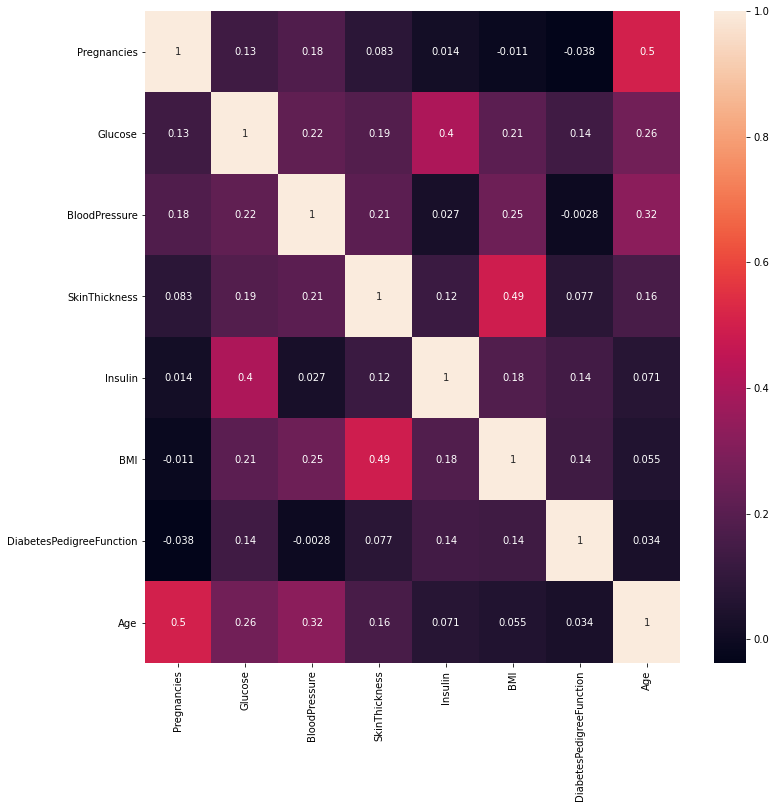

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap(diab_corr, annot = True)
plt.show()

**Considerable Correlation Scores**
- Age & Pregnancies
- Glucose & Insulin
- BMI & SkinThickness

# Scatterplot between Age & Pregnancies

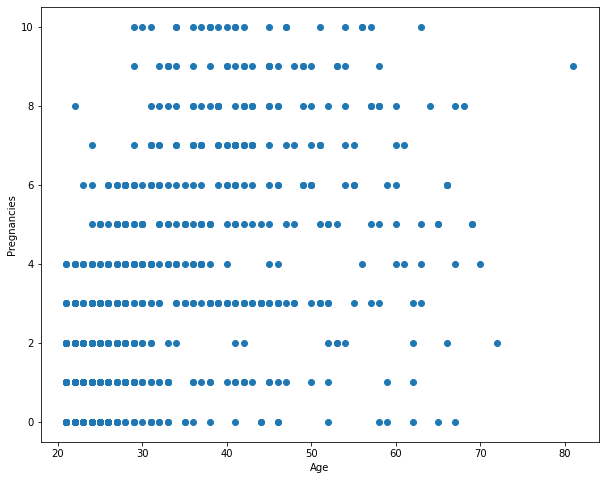

In [26]:
plt.figure(figsize = (10,8))
plt.scatter(diab_df['Age'], diab_df['Pregnancies'])
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

# Scatterplot between Glucose & Insulin

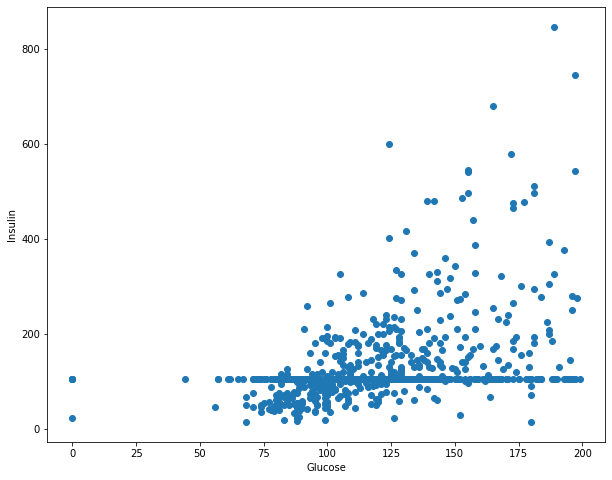

In [27]:
plt.figure(figsize = (10,8))
plt.scatter(diab_df['Glucose'], diab_df['Insulin'])
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

# Scatterplot between SkinThickness & BMI

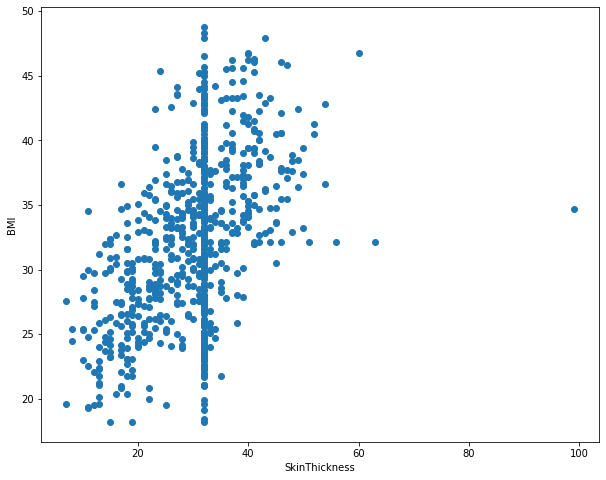

In [28]:
plt.figure(figsize = (10,8))
plt.scatter(diab_df['SkinThickness'], diab_df['BMI'])
plt.xlabel("SkinThickness")
plt.ylabel("BMI")
plt.show()

# Countplot of 'Outcome' column

0 means **Non-Diabetic** & 1 means **Diabetic**

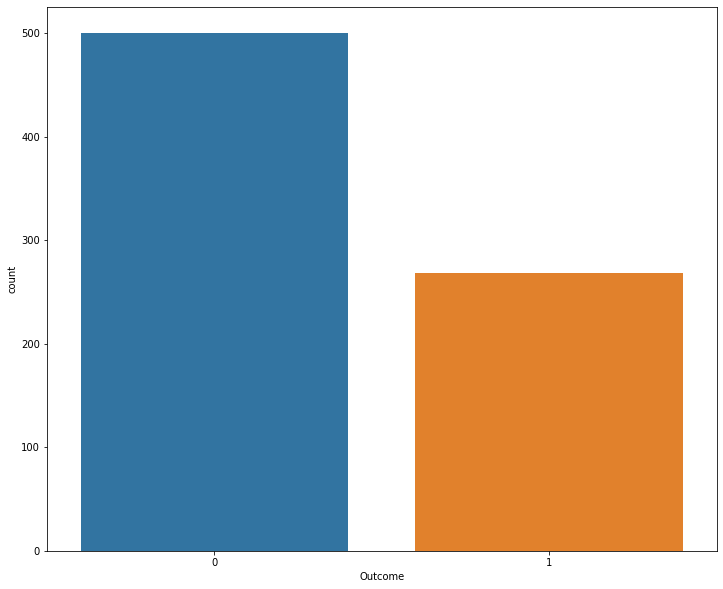

In [29]:
plt.figure(figsize = (12,10))
sns.countplot(diab_df['Outcome'])
plt.show()

# Pairplot

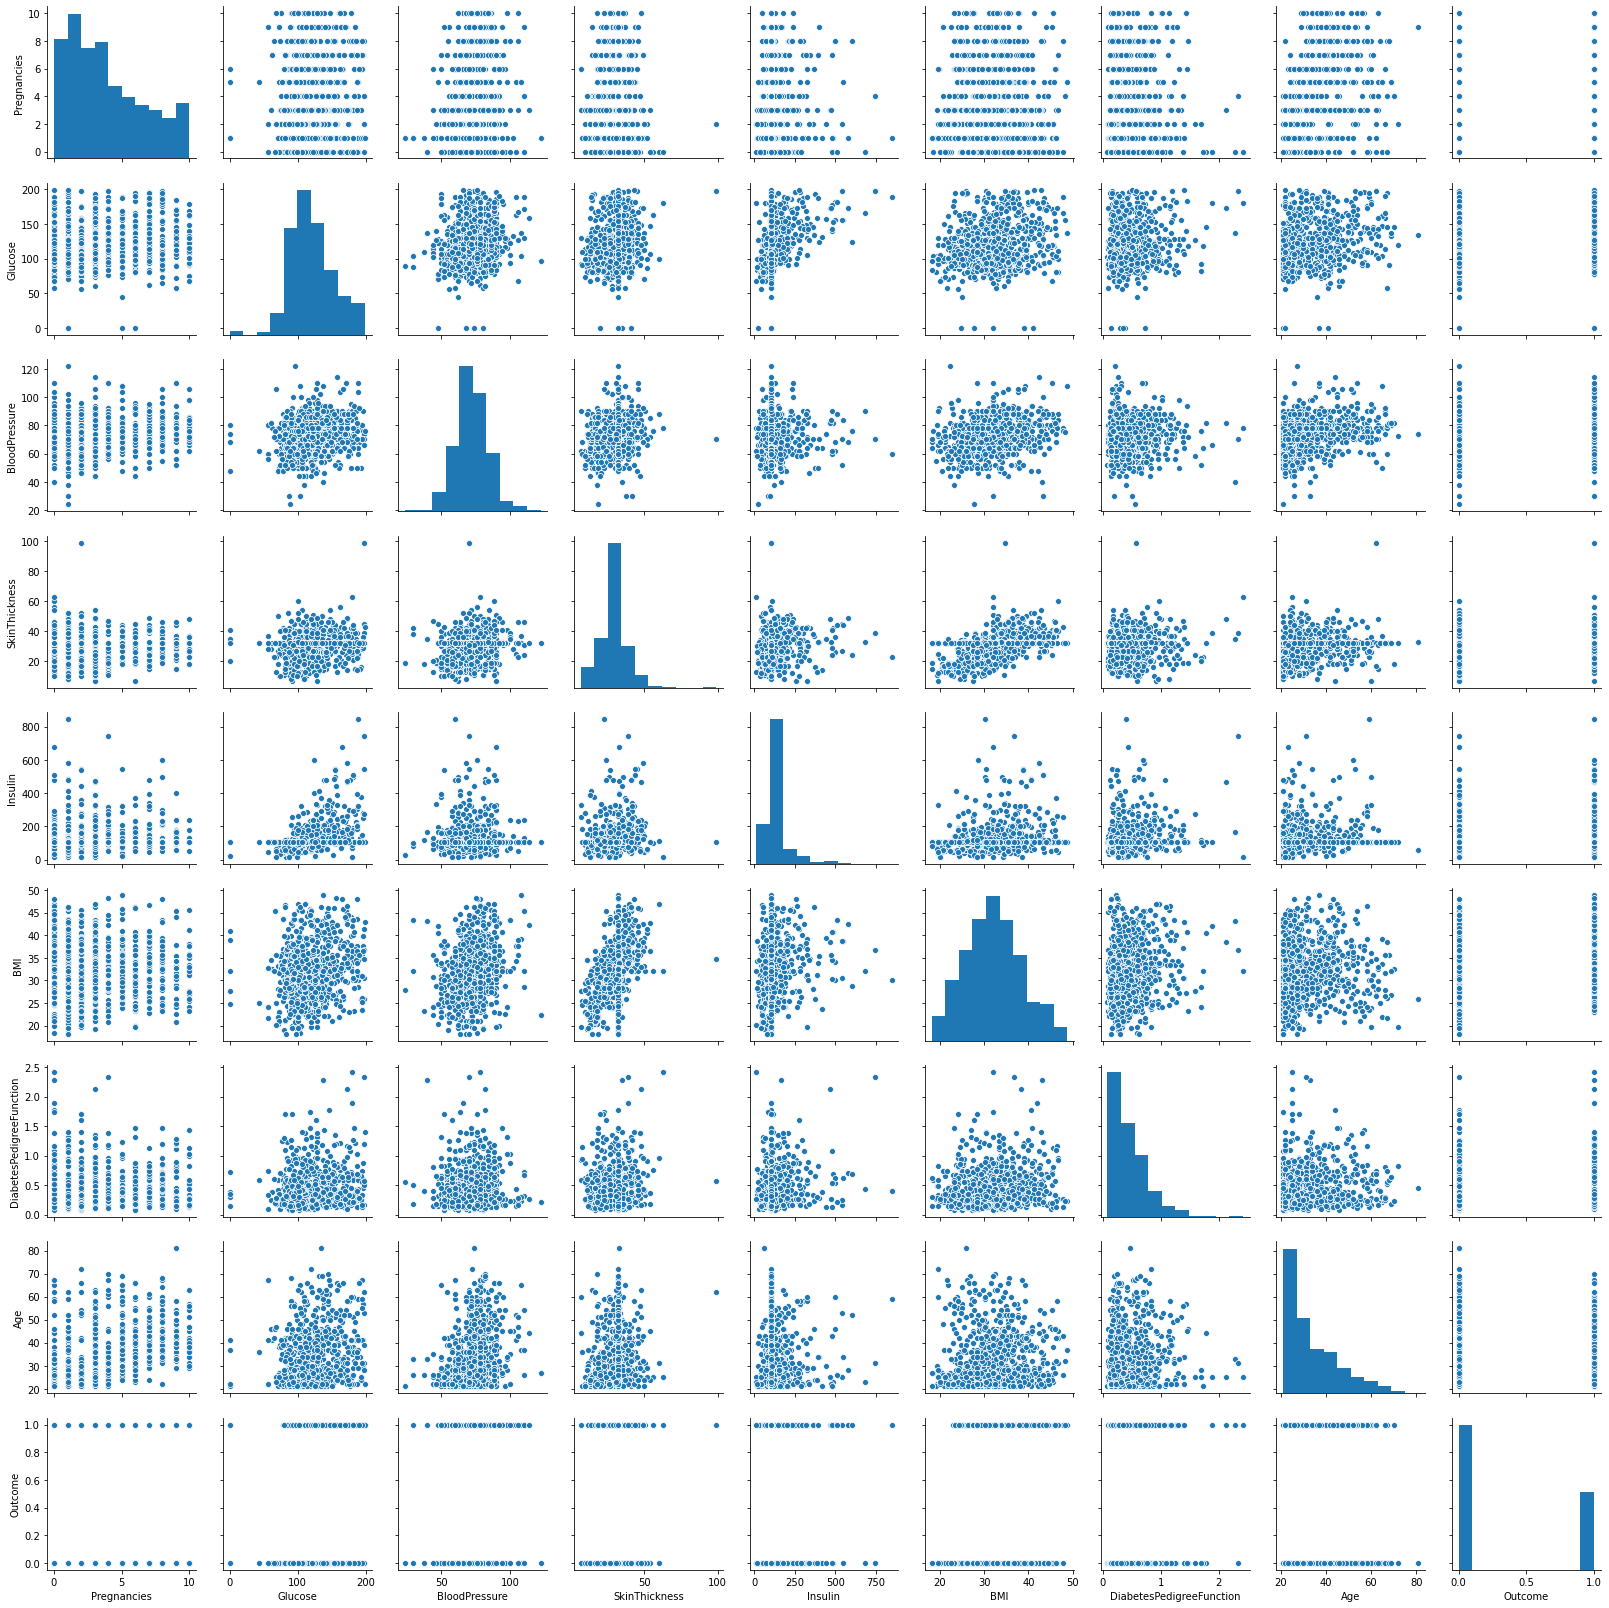

In [30]:
sns.pairplot(diab_df)
plt.show()

# Distributions of Data

In [31]:
num_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

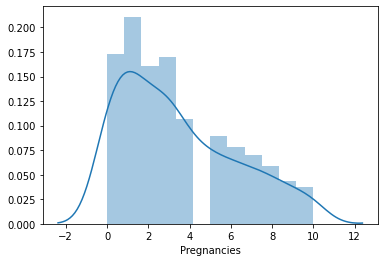

<Figure size 432x288 with 0 Axes>

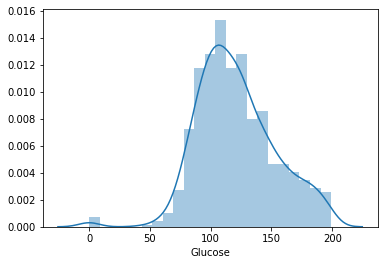

<Figure size 432x288 with 0 Axes>

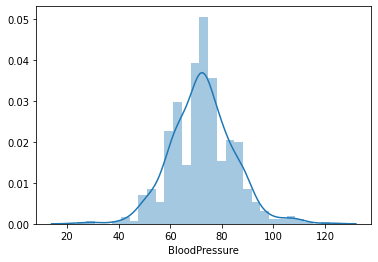

<Figure size 432x288 with 0 Axes>

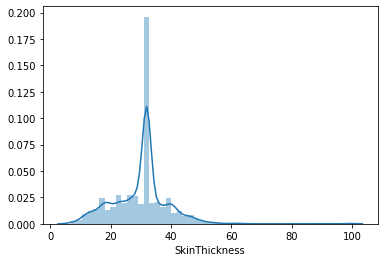

<Figure size 432x288 with 0 Axes>

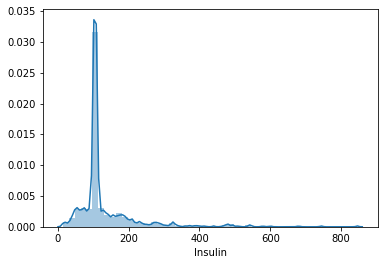

<Figure size 432x288 with 0 Axes>

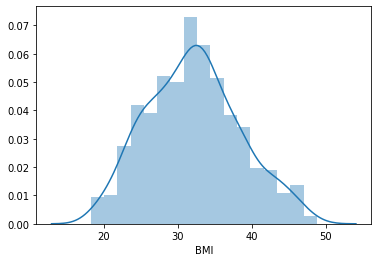

<Figure size 432x288 with 0 Axes>

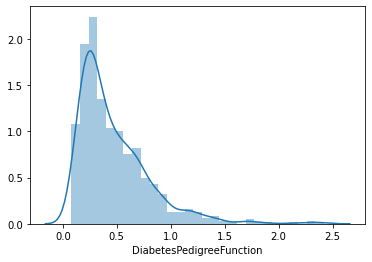

<Figure size 432x288 with 0 Axes>

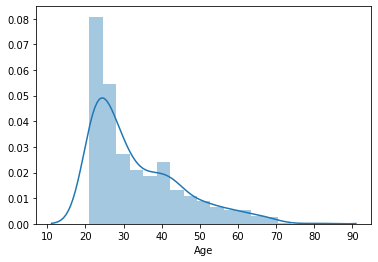

<Figure size 432x288 with 0 Axes>

In [33]:
for i in num_var:
    sns.distplot(diab_df[i])
    plt.figure(i)
    plt.show()

# Boxplots

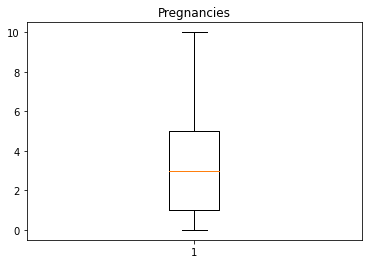

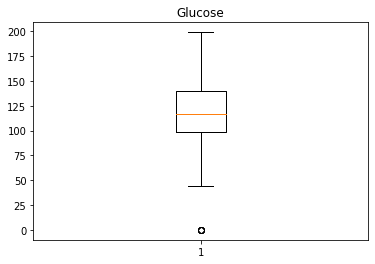

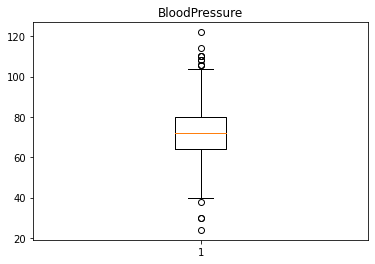

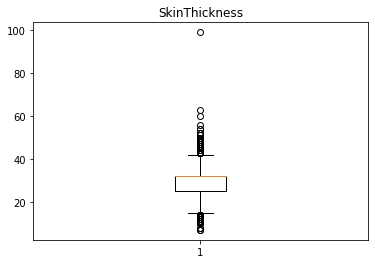

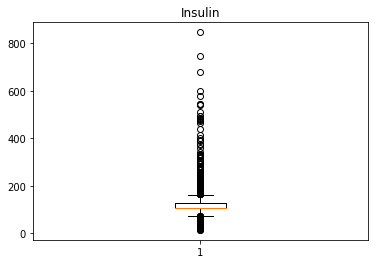

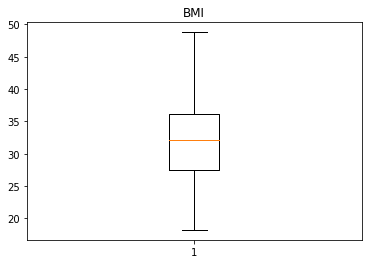

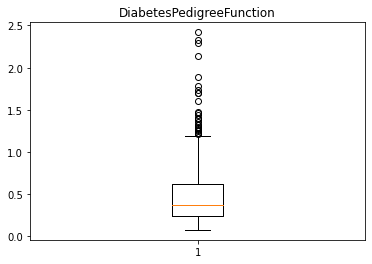

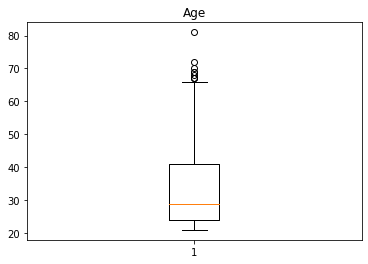

In [34]:
for j in num_var:
    plt.boxplot(diab_df[j])
    plt.title(j)
    plt.show()

# Dividing Predictor Variables & Response Variable

In [35]:
X = diab_df.iloc[:,:-1].values
y = diab_df.iloc[:,-1].values

In [36]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [37]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [38]:
# Changing datatype of response variable from 'object' to 'integer'
y = y.astype(int)

# Splitting into test & training sets

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [40]:
X_train , y_train

(array([[0.00000000e+00, 1.51000000e+02, 9.00000000e+01, ...,
         4.21000000e+01, 3.71000000e-01, 2.10000000e+01],
        [1.00000000e+00, 8.30000000e+01, 6.80000000e+01, ...,
         1.82000000e+01, 6.24000000e-01, 2.70000000e+01],
        [2.00000000e+00, 1.22000000e+02, 7.00000000e+01, ...,
         3.68000000e+01, 3.40000000e-01, 2.70000000e+01],
        ...,
        [4.00000000e+00, 9.40000000e+01, 6.50000000e+01, ...,
         2.47000000e+01, 1.48000000e-01, 2.10000000e+01],
        [3.00000000e+00, 8.50000000e+01, 7.40000000e+01, ...,
         3.01000000e+01, 3.00000000e-01, 3.50000000e+01],
        [5.00000000e+00, 1.36000000e+02, 8.20000000e+01, ...,
         3.21103356e+01, 6.40000000e-01, 6.90000000e+01]]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [41]:
X_test , y_test

(array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
         2.200e+01],
        [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
         2.300e+01],
        [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
         2.500e+01],
        ...,
        [1.000e+00, 9.500e+01, 6.000e+01, ..., 2.390e+01, 2.600e-01,
         2.200e+01],
        [1.000e+00, 1.060e+02, 7.600e+01, ..., 3.750e+01, 1.970e-01,
         2.600e+01],
        [1.000e+01, 1.220e+02, 7.800e+01, ..., 2.760e+01, 5.120e-01,
         4.500e+01]]),
 array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 

# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train

array([[-1.21174709,  0.9144385 ,  1.42744524, ...,  1.5386485 ,
        -0.3002719 , -1.05654479],
       [-0.85867699, -1.19655127, -0.42391913, ..., -2.23613162,
         0.45699051, -0.55622332],
       [-0.5056069 ,  0.01416345, -0.25561327, ...,  0.70156337,
        -0.39305899, -0.55622332],
       ...,
       [ 0.20053329, -0.85506763, -0.6763779 , ..., -1.20951778,
        -0.96774035, -1.05654479],
       [-0.1525368 , -1.13446334,  0.08099843, ..., -0.35663859,
        -0.51278428,  0.11087198],
       [ 0.55360339,  0.44877899,  0.75422183, ..., -0.039125  ,
         0.50488062,  2.94602702]])

In [44]:
X_test

array([[-0.85867699,  2.40454892,  0.24930428, ...,  1.66500097,
         2.7617022 , -0.97315788],
       [-0.5056069 , -0.45149606,  0.08099843, ...,  0.19615348,
        -0.20149854, -0.88977097],
       [ 0.20053329, -1.41385904, -0.92883668, ...,  0.25932971,
        -0.24040926, -0.72299714],
       ...,
       [-0.85867699, -0.82402367, -1.09714253, ..., -1.33587025,
        -0.63250956, -0.97315788],
       [-0.85867699, -0.48254003,  0.24930428, ...,  0.81212178,
        -0.82107688, -0.63961023],
       [ 2.31895387,  0.01416345,  0.41761013, ..., -0.75149007,
         0.12175972,  0.94474111]])

#  Logistic Regression

**Training the Logistic Regression model on the Training set**

In [45]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 0)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Predicting the Test set results
y_pred_logit = logit.predict(X_test)

**Confusion Matrix**

In [47]:
from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred_logit)
print(cm_logit)

[[142  15]
 [ 38  36]]


**Accuracy score**

In [48]:
from sklearn.metrics import accuracy_score
accuracy_logit = accuracy_score(y_test, y_pred_logit)

In [49]:
print((accuracy_logit*100) ,"%")

77.05627705627705 %


**Classification Score**

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logit))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.71      0.49      0.58        74

    accuracy                           0.77       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



**K-fold Cross validation**

**Cross-validation** is a statistical method used to estimate *the skill of machine learning models*.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as **k=10** becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

*It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill* than other methods, such as a simple train/test split.

In [51]:
from sklearn.model_selection import cross_val_score
accuracies_logit = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_logit.mean()*100))  
print("Standard Deviation: {:.2f} %".format(accuracies_logit.std()*100))  

Accuracy: 75.77 %
Standard Deviation: 4.87 %


**ROC Curve**

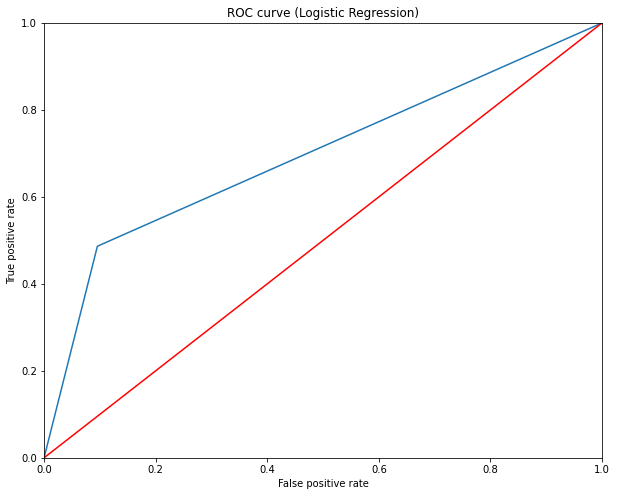

In [52]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_logit, tpr_logit, thresholds = roc_curve(y_test, y_pred_logit)
plt.plot(fpr_logit,tpr_logit,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_logit))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Logistic Regression)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Random Forest

**Training the Random Forest Classification model on the Training set**

In [53]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
# Predicting the Test set results
y_pred_rt = rt.predict(X_test)

**Confusion Matrix**

In [55]:
from sklearn.metrics import confusion_matrix
cm_rt = confusion_matrix(y_test, y_pred_rt)
print(cm_rt)

[[138  19]
 [ 36  38]]


**Accuracy Score**

In [56]:
from sklearn.metrics import accuracy_score
accuracy_rt = accuracy_score(y_test, y_pred_rt)

In [57]:
print((accuracy_rt*100),"%")

76.19047619047619 %


**Classification Score**

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rt))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



**K-fold Cross Validation**

In [59]:
from sklearn.model_selection import cross_val_score
accuracies_rt = cross_val_score(estimator = rt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_rt.mean()*100))  
print("Standard Deviation: {:.2f} %".format(accuracies_rt.std()*100))

Accuracy: 72.61 %
Standard Deviation: 7.17 %


**ROC Curve**

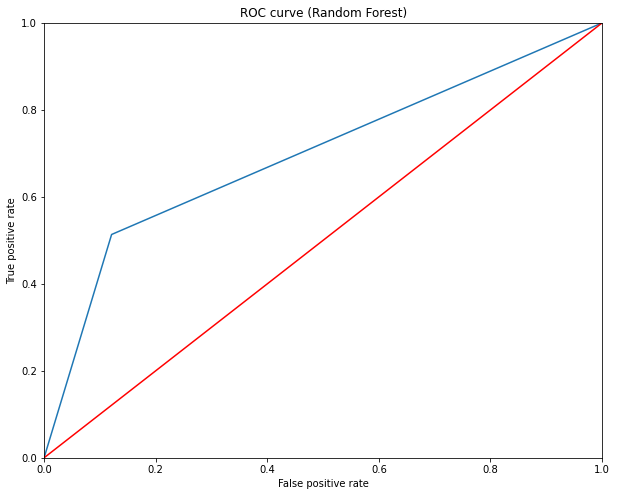

In [60]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_rt, tpr_rt, thresholds = roc_curve(y_test, y_pred_rt)
plt.plot(fpr_rt,tpr_rt,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_rt))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Random Forest)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# XGBoost Classifier

**Training XGBoost on the Training set**

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[20:52:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [62]:
# Predicting the Test set results
y_pred_xg = xgb.predict(X_test)

**Confusion Matrix**

In [63]:
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)

[[129  28]
 [ 25  49]]


**Accuracy Score**

In [64]:
from sklearn.metrics import accuracy_score
accuracy_xg = accuracy_score(y_test, y_pred_xg)

In [65]:
print((accuracy_xg*100),"%")

77.05627705627705 %


**Classification Score**

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       157
           1       0.64      0.66      0.65        74

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



**K-Fold Cross Validation**

In [67]:
from sklearn.model_selection import cross_val_score
accuracies_xg = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_xg.mean()*100))  
print("Standard Deviation: {:.2f} %".format(accuracies_xg.std()*100))

[20:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

**ROC Curve**

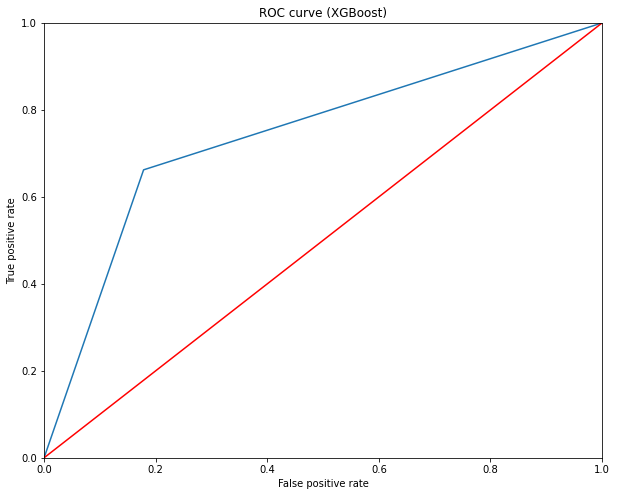

In [68]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_xg)
plt.plot(fpr_xg,tpr_xg,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_xg))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (XGBoost)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# K Nearest Neibour (KNN)

**Initiating a for loop to calculate best ROC-AUC score of different number of neighbour cells**

*The number of Neighbour(K) with highest AUC Score will be selected*

In [69]:
roc_auc = {}
il = []
accuracy_knn=[]
for  i in range(1,100):
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  accuracy_knn.append( sklearn.metrics.roc_auc_score(y_test,y_pred) )

  roc_auc.update({'K':il})
  roc_auc.update({'ROC_ACC':accuracy_knn})

In [70]:
temp = pd.DataFrame(roc_auc)
temp.sort_values('ROC_ACC', ascending = False, inplace = True, ignore_index = True)
temp.head(10)

,K,ROC_ACC
0,9,0.753099
1,7,0.747117
2,8,0.741995
3,13,0.736013
4,11,0.732441
5,12,0.722112
6,10,0.718540
7,15,0.715743
8,14,0.715355
9,5,0.710148


**K = 9** has highest AUC score, hence it is being selected

**Training the K-NN model on the Training set**

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [72]:
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

**Confusion Matrix**

In [73]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[141  16]
 [ 29  45]]


**Accuracy**

In [74]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [75]:
print((accuracy_knn*100),"%")

80.51948051948052 %


**Classification Score**

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       157
           1       0.74      0.61      0.67        74

    accuracy                           0.81       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.80      0.81      0.80       231



**K-Fold Cross Validation**

In [77]:
from sklearn.model_selection import cross_val_score
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_knn.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_knn.std()*100))

Accuracy: 73.74 %
Standard Deviation: 7.71 %


**ROC Curve**

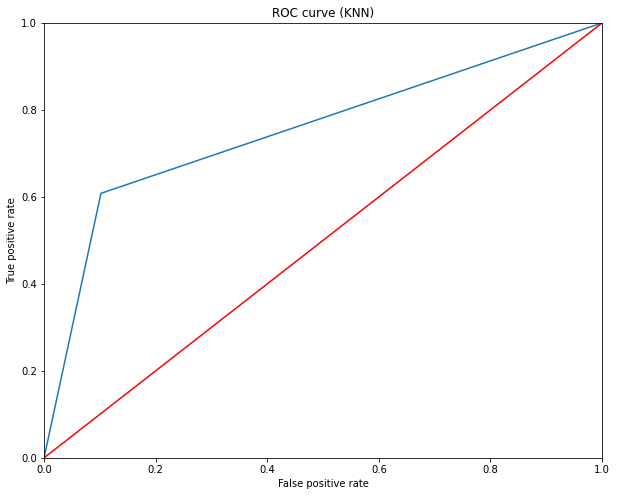

In [78]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr_knn,tpr_knn,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_knn))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (KNN)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Naive Bayes

**Training the Naive Bayes model on the Training set**

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
# Predicting the Test set results
y_pred_nb = nb.predict(X_test)

**Confusion Matrix**

In [81]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[136  21]
 [ 37  37]]


**Accuracy Score**

In [82]:
from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [83]:
print((accuracy_nb*100),"%")

74.89177489177489 %


**Classification Score**

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.87      0.82       157
           1       0.64      0.50      0.56        74

    accuracy                           0.75       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



**K-Fold Cross Validation**

In [85]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_nb.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_nb.std()*100)) 

Accuracy: 73.75 %
Standard Deviation: 5.27 %


**ROC Curve**

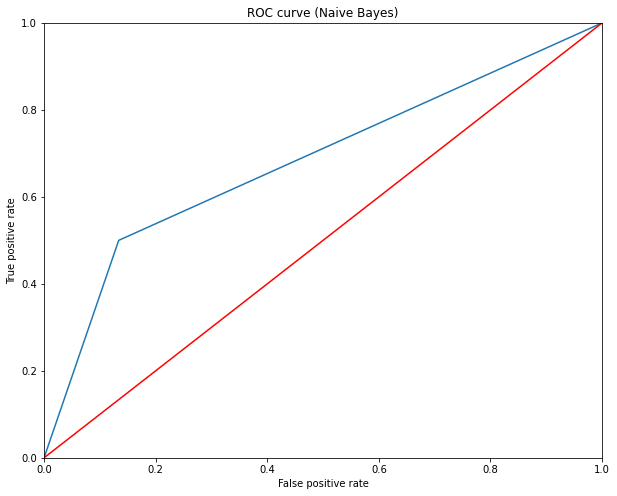

In [86]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr_nb,tpr_nb,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_nb))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Naive Bayes)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Kernel SVM

**Training the Kernel SVM model on the Training set**

In [87]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [88]:
# Predicting the Test set results
y_pred_svm = svm.predict(X_test)

**Confusion Matrix**

In [89]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[141  16]
 [ 40  34]]


**Accuracy Score**

In [90]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [91]:
print((accuracy_svm*100),"%")

75.75757575757575 %


**Classification Score**

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       157
           1       0.68      0.46      0.55        74

    accuracy                           0.76       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.75      0.76      0.74       231



**K-Fold Cross Validation**

In [93]:
from sklearn.model_selection import cross_val_score
accuracies_svm = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_svm.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm.std()*100))

Accuracy: 76.52 %
Standard Deviation: 4.78 %


**ROC Curve**

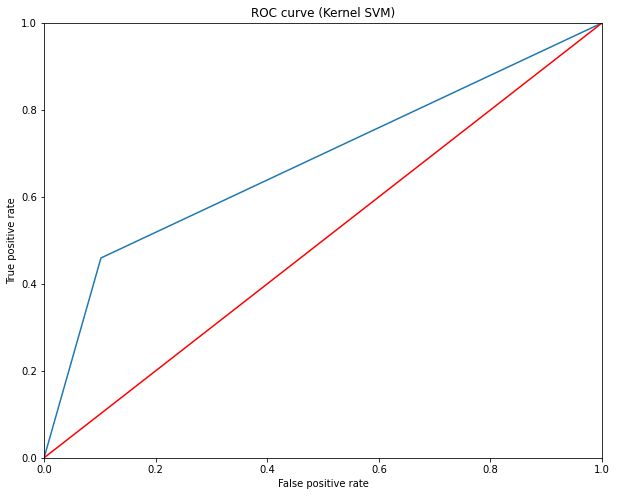

In [94]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr_svm,tpr_svm,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_svm))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Kernel SVM)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Decision Tree

**Training the Decision Tree Classification model on the Training set**

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [96]:
# Predicting the Test set results
y_pred_dt = dt.predict(X_test)

**Confusion Matrix**

In [97]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[111  46]
 [ 31  43]]


**Accuracy Score**

In [98]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [99]:
print((accuracy_dt*100),"%")

66.66666666666666 %


**Confusion Matrix**

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       157
           1       0.48      0.58      0.53        74

    accuracy                           0.67       231
   macro avg       0.63      0.64      0.64       231
weighted avg       0.69      0.67      0.67       231



**K-Fold Cross Validation**

In [101]:
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_dt.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std()*100))

Accuracy: 65.89 %
Standard Deviation: 5.82 %


**ROC Curve**

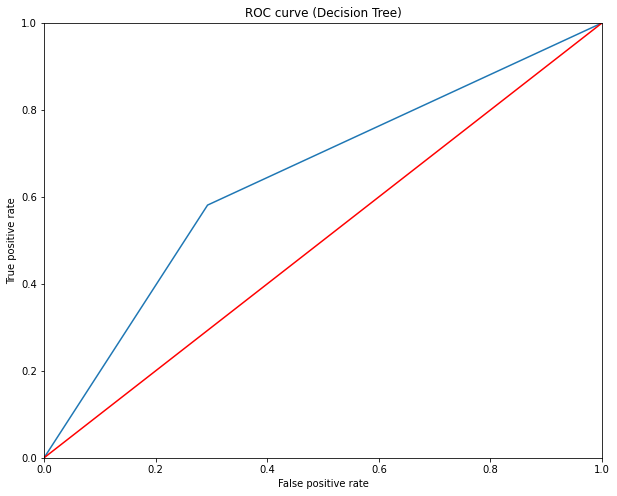

In [102]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr_dt,tpr_dt,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_dt))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Decision Tree)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# ROC Curve of all the Algorithms

In [103]:
classifiers = ['Decision Tree', 'SVM', 'Naive Bayes', 'KNN', 'XGBoost', 'Random Forest', 'Logistic Regression']

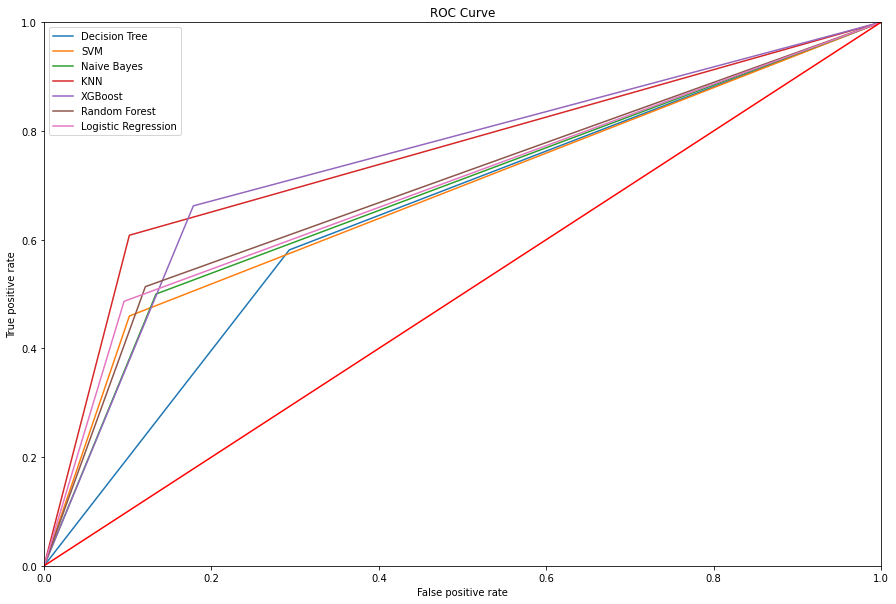

In [104]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (15,10))

plt.plot(fpr_dt,tpr_dt,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_dt))
plt.plot(fpr_svm,tpr_svm,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_svm))
plt.plot(fpr_nb,tpr_nb,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_nb))
plt.plot(fpr_knn,tpr_knn,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_knn))
plt.plot(fpr_xg,tpr_xg,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_xg))
plt.plot(fpr_rt,tpr_rt,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_rt))
plt.plot(fpr_logit,tpr_logit,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_logit))

plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(classifiers)
plt.show()

**The AUC scores for KNN classifier & XGBoost classifier are very much similar. So, here to find the best model AIC score will be used.**

**Lower the AIC score better the model**

In [105]:
from math import log

**AIC Score for KNN**

In [106]:
resid_knn = y_test - y_pred_knn
sse_knn = sum(resid_knn**2)
var_knn = 9
AIC_knn = 2 * var_knn - 2* log(sse_knn)
print(AIC_knn)

10.38667502045936


**AIC Score for XGBoost Classifier**

In [107]:
resid_xg = y_test - y_pred_xg
sse_xg = sum(resid_xg ** 2)
var_xg = 9
AIC_xg = 2 * var_xg - 2* log(sse_xg)
print(AIC_xg)

10.059416172895755


As, AIC Score for **KNN** model is greater than that of **XGBoost Classifier**.

*Compare Outputs came from* **KNN** *&* **XGBoost** 

# Creating a Dataframe to compare the results

In [108]:
results = pd.DataFrame()
results['Actual'] = y_test
results['KNN_predictions'] = y_pred_knn
results['XGBoost_Predictions'] = y_pred_xg

In [109]:
print(results)

     Actual  KNN_predictions  XGBoost_Predictions
0         1                1                    1
1         0                0                    0
2         0                0                    0
3         1                1                    1
4         0                0                    0
..      ...              ...                  ...
226       1                0                    1
227       1                0                    0
228       0                0                    0
229       0                0                    0
230       0                1                    1

[231 rows x 3 columns]
